importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator # use for feature scaling and transformation

2023-04-18 19:10:02.231992: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Part 1 Data Preprocessing

preprocess training set and test set separately, avoid overfitting

Preprocessing the Training set, avoiding overfitting, feature scaling, image transformation. Connect the train_datagen object to our training set images, flow... is a method in imagedatagenerator class. the size will be fed to the CNN

In [2]:
#
# This is a sample Notebook to demonstrate how to read "MNIST Dataset"
#
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)

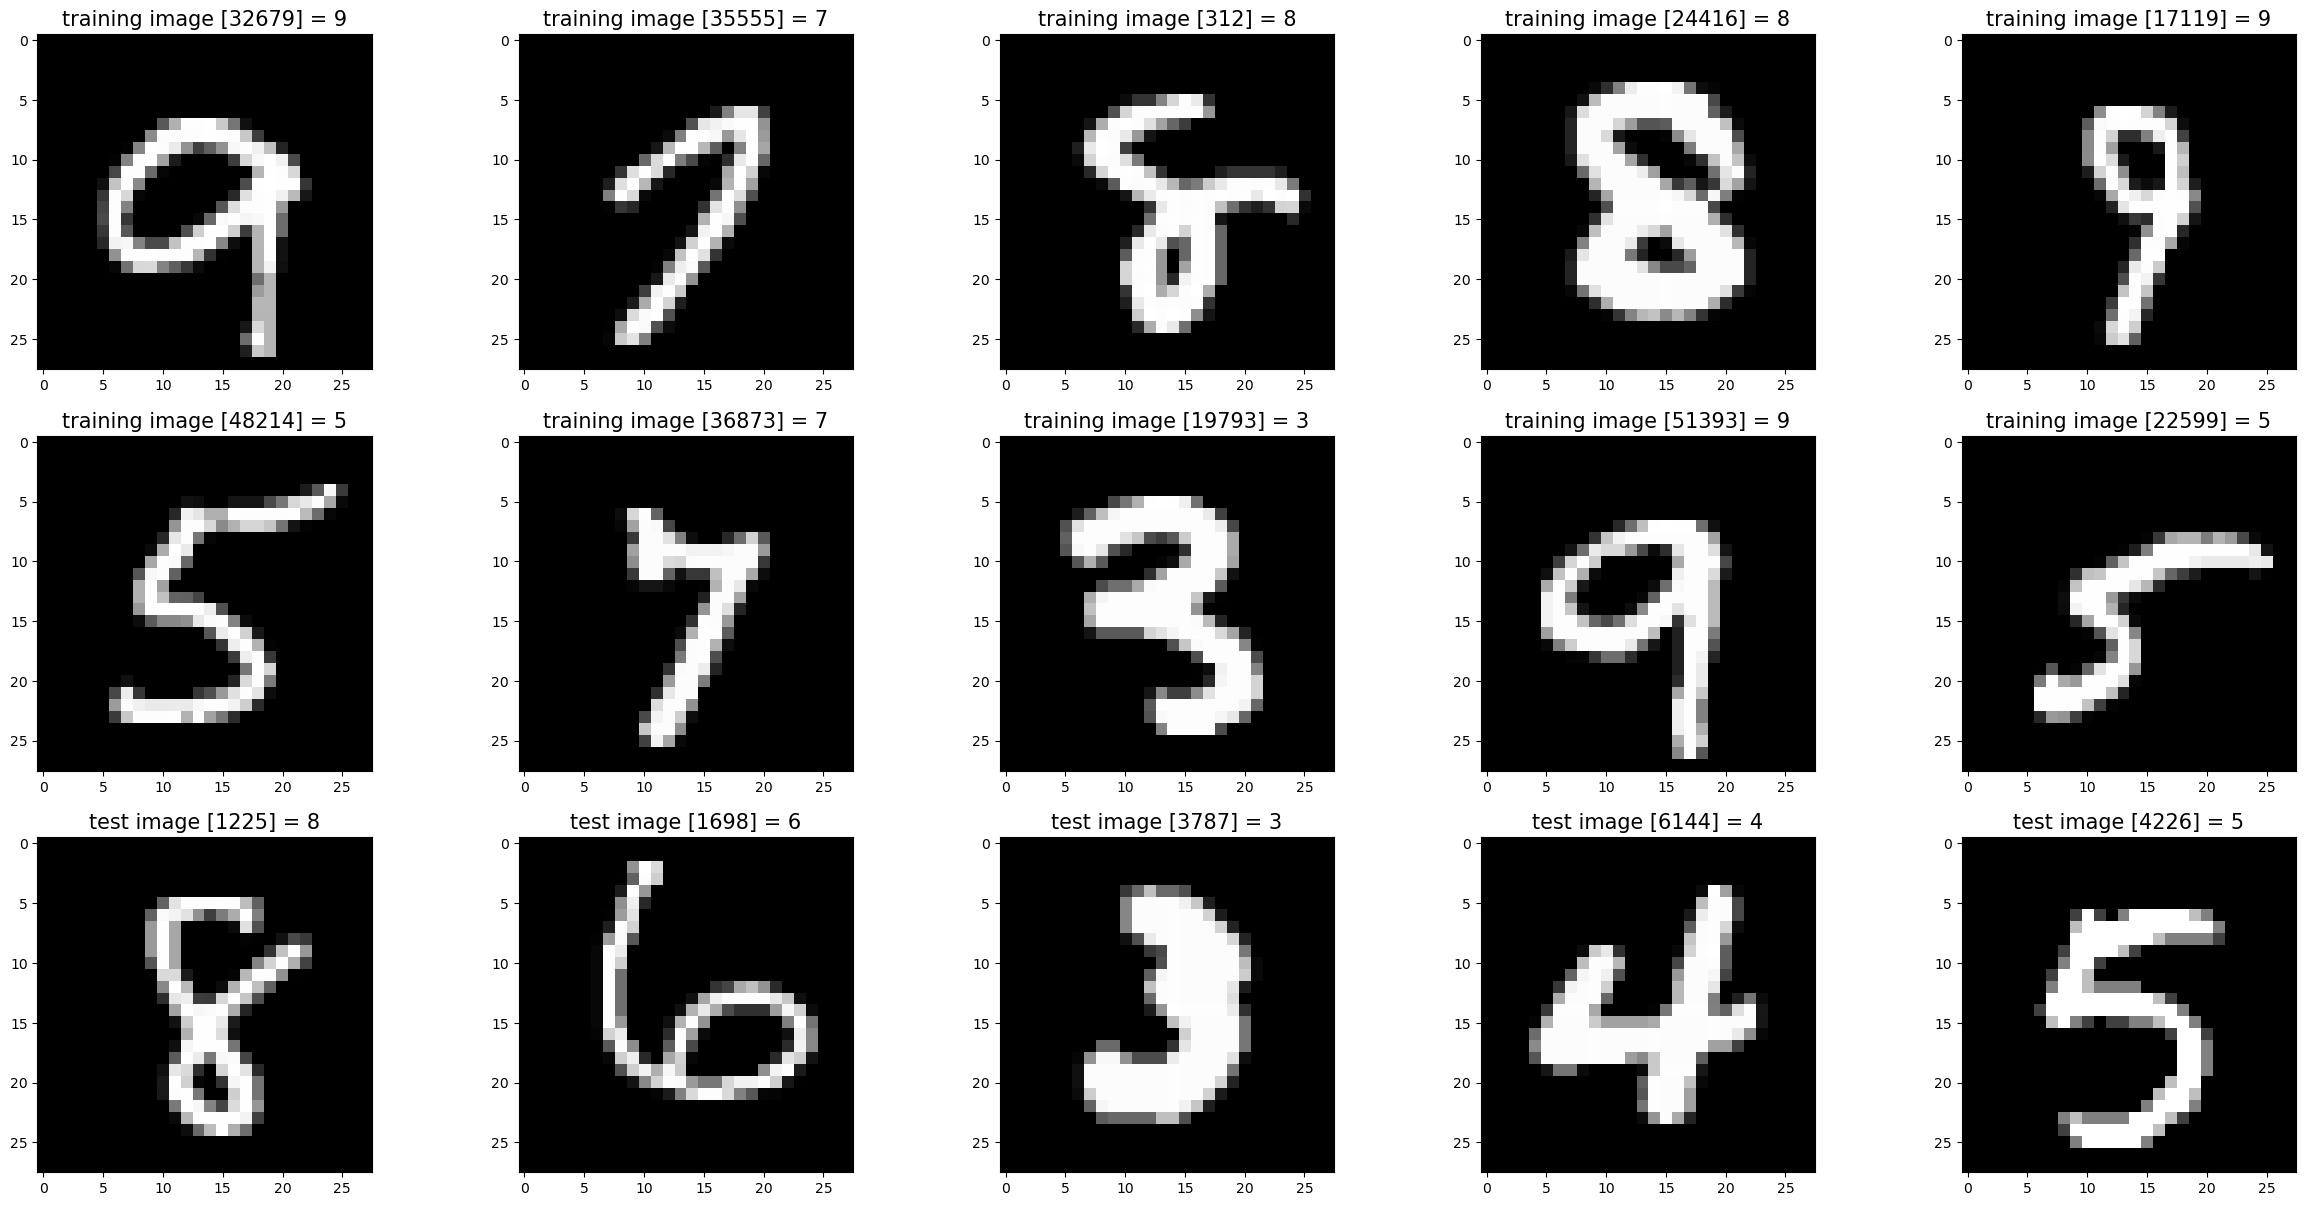

In [3]:
#
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#
#input_path = '../input'
training_images_filepath = join('/Users/jiyi/Desktop/534/module13_CNN/archive/train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join('/Users/jiyi/Desktop/534/module13_CNN/archive/train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join('/Users/jiyi/Desktop/534/module13_CNN/archive/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join('/Users/jiyi/Desktop/534/module13_CNN/archive/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

Preprocessing the Test set, just feature scale them and no transformation so it prevents information leakage, target size and batch size train and test should be the same

# Part 2 Building the CNN

Initialising the CNN

In [4]:
cnn=tf.keras.models.Sequential()

Step 1 Convolution filters = numbers of feature detectors, kernel = size of feature of detecotr 3 by 3, input shape of images RGB, black and white instead of 3 we need to choose 1

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=[28,28,1]))

Step 2 Pooling the size of the squre, stride the move or sliding

In [6]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

Adding a second convolutional layer, no need for input_shpae for the next layers

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

Step 3 Flattering

In [8]:
cnn.add(tf.keras.layers.Flatten())

Step 4 Full Connection

In [9]:
cnn.add(tf.keras.layers.Dense(units=64,activation='relu'))

Step 5 Output Layer

In [10]:
cnn.add(tf.keras.layers.Dense(units=10,activation='softmax'))

# Part 3 Training the CNN

compiling the CNN

In [11]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Training the CNN on the Training set and evaluating it on the Test set

In [12]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)
cnn.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 45s 23ms/step - loss: 0.2965 - accuracy: 0.9376 - val_loss: 0.0683 - val_accuracy: 0.9802
Epoch 2/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0671 - accuracy: 0.9802 - val_loss: 0.0536 - val_accuracy: 0.9839
Epoch 3/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0514 - accuracy: 0.9844 - val_loss: 0.0681 - val_accuracy: 0.9792
Epoch 4/5
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0429 - accuracy: 0.9865 - val_loss: 0.0575 - val_accuracy: 0.9844
Epoch 5/5
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0347 - accuracy: 0.9896 - val_loss: 0.0608 - val_accuracy: 0.9824
